# COS30049 - Assignment 2 (AI-based Project)

Notebook by:
Jackson Webb (103572997), Declan Hargreaves (104300584), Leo Holden (103996982)

## MinTemp & MaxTemp Prediction

### Data Processing

In [2]:
import pandas as pd
import matplotlib as plt


# Load dataset
file_path = './raw/weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop the irrelavent columns
weather_data.drop(['Rainfall'], axis=1, inplace=True)
weather_data.drop(['Evaporation'], axis=1, inplace=True)
weather_data.drop(['Sunshine'], axis=1, inplace=True)
weather_data.drop(['WindGustDir'], axis=1, inplace=True) 
weather_data.drop(['WindGustSpeed'], axis=1, inplace=True)
weather_data.drop(['WindDir9am'], axis=1, inplace=True)
weather_data.drop(['WindDir3pm'], axis=1, inplace=True)
weather_data.drop(['WindSpeed9am'], axis=1, inplace=True)
weather_data.drop(['WindSpeed3pm'], axis=1, inplace=True)
weather_data.drop(['Humidity9am'], axis=1, inplace=True)
weather_data.drop(['Humidity3pm'], axis=1, inplace=True)
weather_data.drop(['Pressure9am'], axis=1, inplace=True)
weather_data.drop(['Pressure3pm'], axis=1, inplace=True)
weather_data.drop(['Cloud9am'], axis=1, inplace=True)
weather_data.drop(['Cloud3pm'], axis=1, inplace=True)
weather_data.drop(['Temp9am'], axis=1, inplace=True)
weather_data.drop(['Temp3pm'], axis=1, inplace=True)
weather_data.drop(['RainToday'], axis=1, inplace=True)
weather_data.drop(['RainTomorrow'], axis=1, inplace=True)

# Identify missing values in the dataset
missing_values = weather_data.isnull().sum()
print(missing_values)

# Group the data by 'Location' and fill missing values with the median for that location
weather_data['MinTemp'] = weather_data.groupby('Location')['MinTemp'].transform(lambda x: x.fillna(x.median()))
weather_data['MaxTemp'] = weather_data.groupby('Location')['MaxTemp'].transform(lambda x: x.fillna(x.median()))

# Verify if there are still any missing values
missing_values = weather_data.isnull().sum()
print(missing_values)


# Data frame creation and visualistation
data = {
    'Date': weather_data['Date'],
    'Location': weather_data['Location'],
    'MinTemp': weather_data['MinTemp'],
    'MaxTemp': weather_data['MaxTemp']
}
weather_df = pd.DataFrame(data)
melb_weather_df = weather_df[(weather_df['Location'] == 'Melbourne') | (weather_df['Location'] == 'MelbourneAirport')]

print("Original DataFrame:")
print(weather_df)

print("Melbourne DataFrame:")
print(melb_weather_df)

Date           0
Location       0
MinTemp     1485
MaxTemp     1261
dtype: int64
Date        0
Location    0
MinTemp     0
MaxTemp     0
dtype: int64
Original DataFrame:
              Date Location  MinTemp  MaxTemp
0       01-12-2008   Albury     13.4     22.9
1       02-12-2008   Albury      7.4     25.1
2       03-12-2008   Albury     12.9     25.7
3       04-12-2008   Albury      9.2     28.0
4       05-12-2008   Albury     17.5     32.3
...            ...      ...      ...      ...
145455  21-06-2017    Uluru      2.8     23.4
145456  22-06-2017    Uluru      3.6     25.3
145457  23-06-2017    Uluru      5.4     26.9
145458  24-06-2017    Uluru      7.8     27.0
145459  25-06-2017    Uluru     14.9     31.1

[145460 rows x 4 columns]
Melbourne DataFrame:
             Date          Location  MinTemp  MaxTemp
64191  01-01-2009  MelbourneAirport     11.2     19.9
64192  02-01-2009  MelbourneAirport      7.8     17.8
64193  03-01-2009  MelbourneAirport      6.3     21.1
64194  04-01-2

### Data Splitting

Extract features and target variable.

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = melb_weather_df.drop('MinTemp', axis=1)  # Features
y = melb_weather_df['MinTemp']  # Target variable

First split: training + validation and test sets

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Second split: training and validation sets

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

**Output Size of Resulting Dataset**

In [6]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 3720 samples
Validation set size: 1241 samples
Test set size: 1241 samples


### Feature Engineering

Extracting Date Features and Label Encoding Location

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Creating deep copy of the dataframe
melb_weather_df = melb_weather_df.copy()

# Converting date format
melb_weather_df['Date'] = pd.to_datetime(melb_weather_df['Date'], format='%d-%m-%Y')

# Extract useful features in the data
melb_weather_df.loc[:, 'Year'] = melb_weather_df['Date'].dt.year
melb_weather_df.loc[:, 'Month'] = melb_weather_df['Date'].dt.month
melb_weather_df.loc[:, 'DayOfYear'] = melb_weather_df['Date'].dt.dayofyear

# Check missing location values
melb_weather_df = melb_weather_df.dropna(subset=['Location'])

# Label encode the location column so it isn't a string
label_encoder = LabelEncoder()
melb_weather_df.loc[:, 'Location'] = label_encoder.fit_transform(melb_weather_df['Location'])

melb_weather_df.head()

,Date,Location,MinTemp,MaxTemp,Year,Month,DayOfYear
64191,2009-01-01,1,11.2,19.9,2009,1,1
64192,2009-01-02,1,7.8,17.8,2009,1,2
64193,2009-01-03,1,6.3,21.1,2009,1,3
64194,2009-01-04,1,8.1,29.2,2009,1,4
64195,2009-01-05,1,9.7,29.0,2009,1,5


### Scatter Plot Visualisation

Melbourne MinTemp & MaxTemp over time

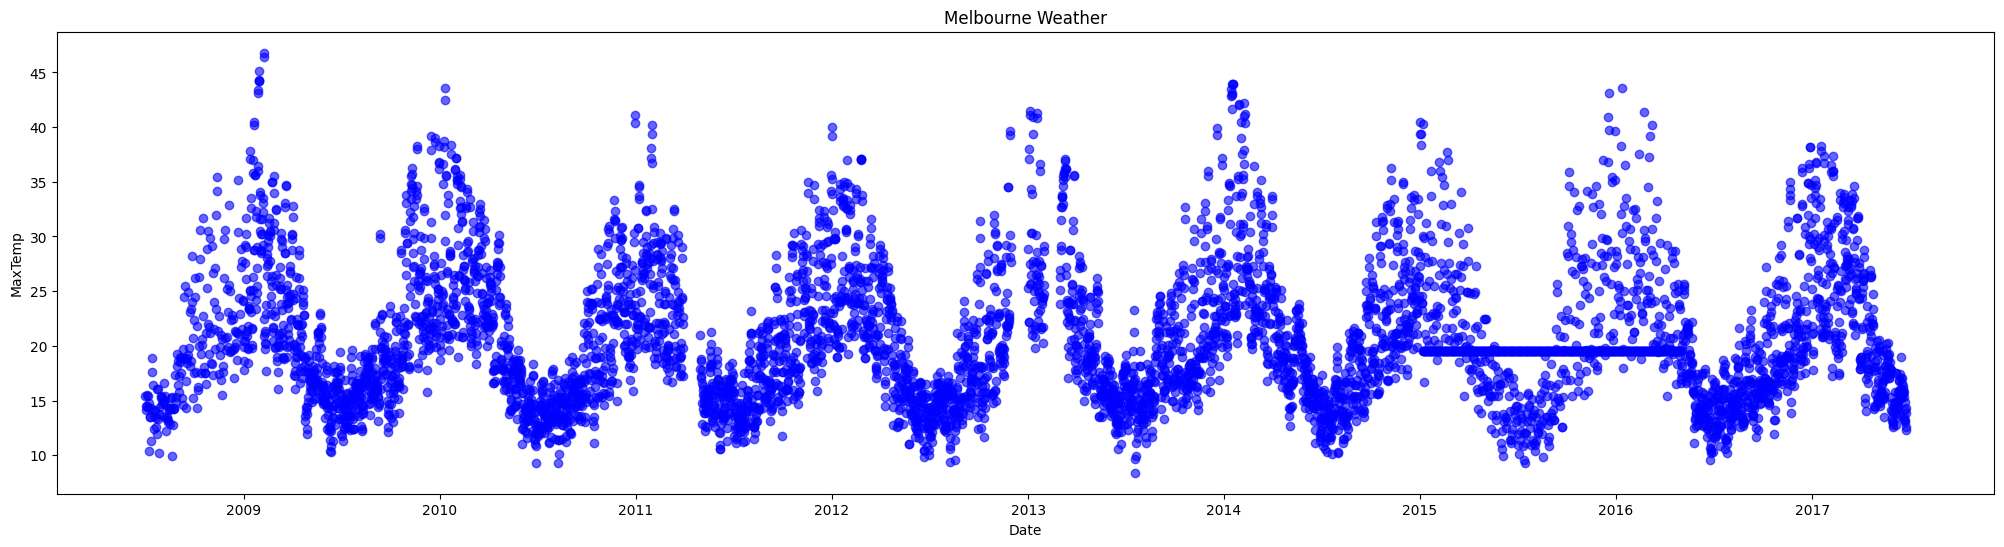

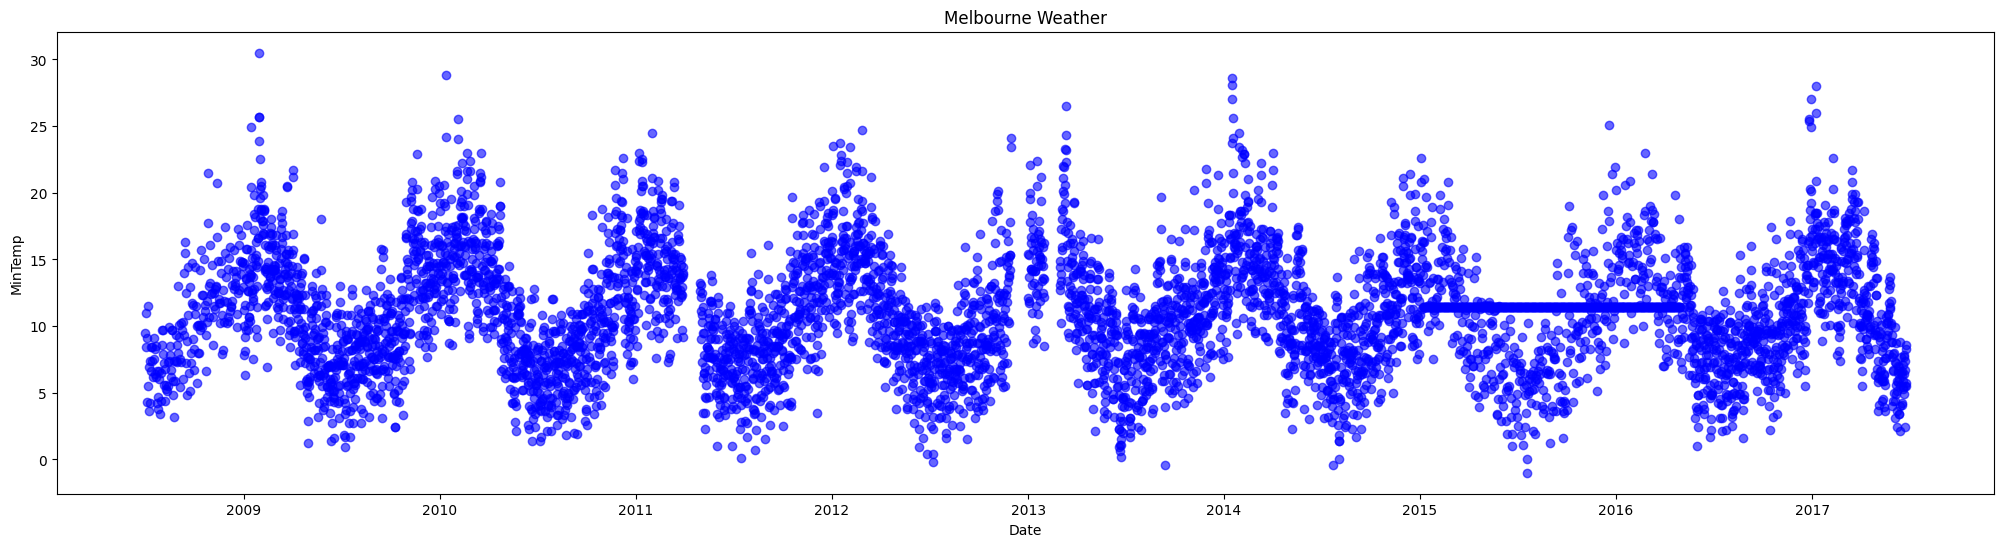

In [8]:
import matplotlib.pyplot as plt

# Visualise the data on scatter plots
plt.figure(figsize=(25, 6))
plt.scatter(melb_weather_df['Date'], melb_weather_df['MaxTemp'], alpha=0.6, color='b')
plt.title('Melbourne Weather')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.show()

plt.figure(figsize=(25, 6))
plt.scatter(melb_weather_df['Date'], melb_weather_df['MinTemp'], alpha=0.6, color='b')
plt.title('Melbourne Weather')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.show()

### Model Training: Predicting MinTemp

RMSE - RF MinTemp: 2.7110025770188306
MSE - RF MinTemp: 7.34953497260274
MAE - RF MinTemp: 2.060998388396455
R2 - RF MinTemp: 0.5679819392743878
RMSE - GB MinTemp: 2.8374610238517435
MSE - GB MinTemp: 8.051185061877783
MAE - GB MinTemp: 2.264605993488182
R2 - GB MinTemp: 0.5267377636896012


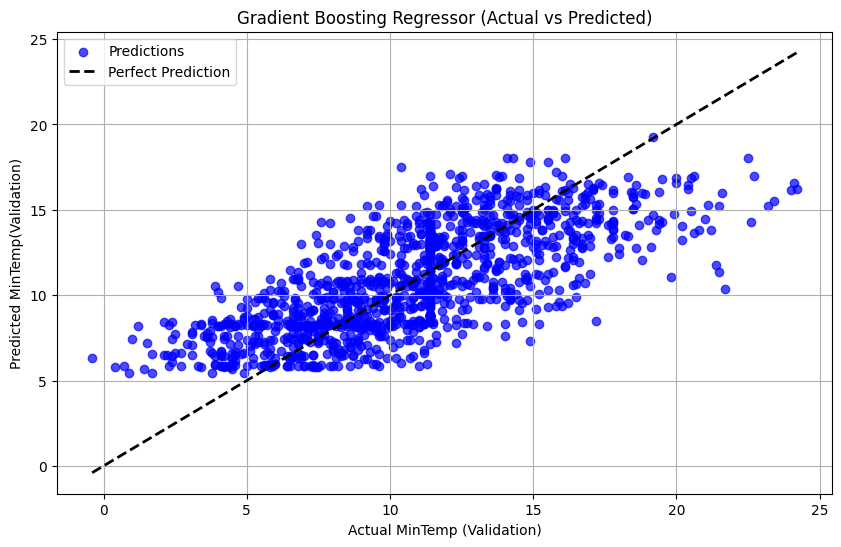

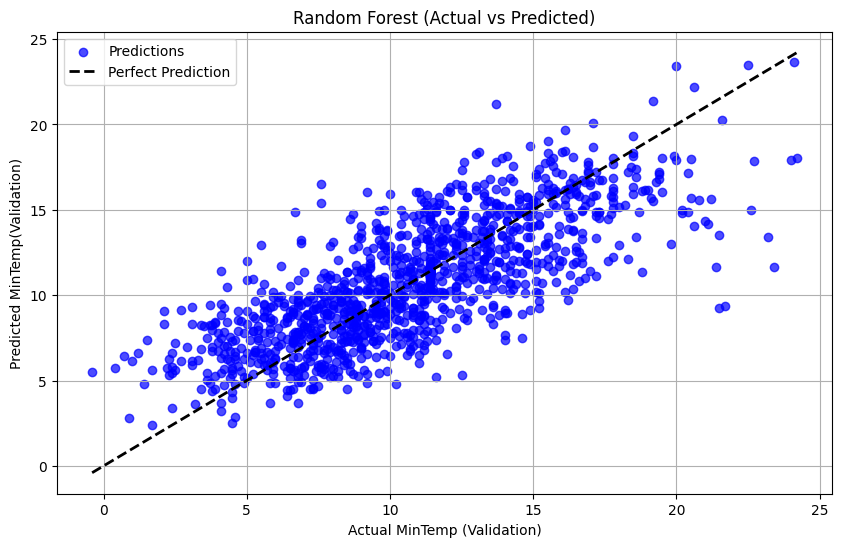

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = melb_weather_df.drop(['MinTemp', 'MaxTemp', 'Date'], axis=1)  
y_min = melb_weather_df['MinTemp']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate RFR
y_predict_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_predict_rf) 
rmse_rf = root_mean_squared_error(y_val, y_predict_rf) 
mae_rf = mean_absolute_error(y_val, y_predict_rf)
r2_rf = r2_score(y_val, y_predict_rf)
print(f"RMSE - RF MinTemp: {rmse_rf}")
print(f"MSE - RF MinTemp: {mse_rf}")
print(f"MAE - RF MinTemp: {mae_rf}")
print(f"R2 - RF MinTemp: {r2_rf}")

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate GB
y_predict_gb = gb.predict(X_val)
mse_gb = mean_squared_error(y_val, y_predict_gb)
rmse_gb = root_mean_squared_error(y_val, y_predict_gb)
mae_gb = mean_absolute_error(y_val, y_predict_gb)
r2_gb = r2_score(y_val, y_predict_gb)
print(f"RMSE - GB MinTemp: {rmse_gb}")
print(f"MSE - GB MinTemp: {mse_gb}")
print(f"MAE - GB MinTemp: {mae_gb}")
print(f"R2 - GB MinTemp: {r2_gb}")

# Visualise the data on scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_predict_gb, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual MinTemp (Validation)')
plt.ylabel('Predicted MinTemp(Validation)')
plt.title('Gradient Boosting Regressor (Actual vs Predicted)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_predict_rf, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual MinTemp (Validation)')
plt.ylabel('Predicted MinTemp(Validation)')
plt.title('Random Forest (Actual vs Predicted)')
plt.grid()
plt.legend()
plt.show()


### Model Training: Predicting MaxTemp

RMSE - RF MaxTemp: 3.242906828421738
MSE - RF MaxTemp: 10.516444697824335
MAE - RF MaxTemp: 2.350296535052377
R2 - RF MaxTemp: 0.7075450409297699
RMSE - GB MaxTemp: 3.968881273671205
MSE - GB MaxTemp: 15.752018564497964
MAE - GB MaxTemp: 3.064083511174848
R2 - GB MaxTemp: 0.5619473998178479


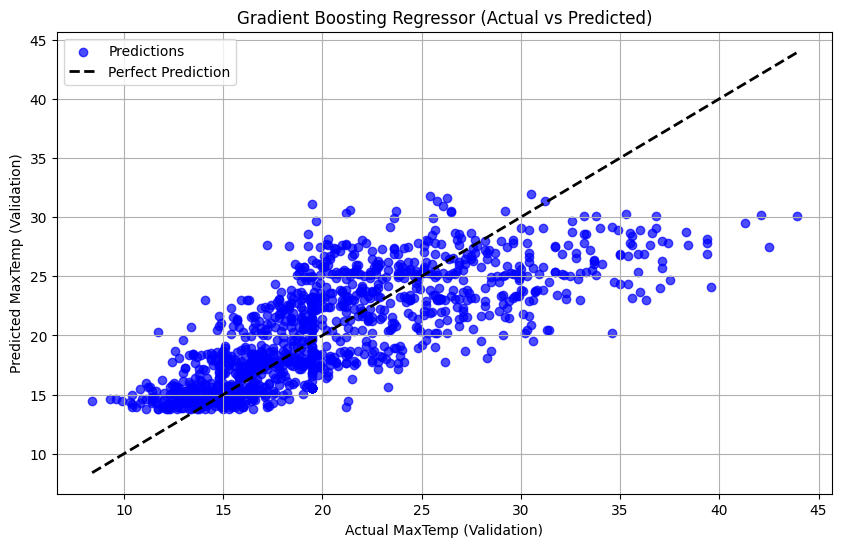

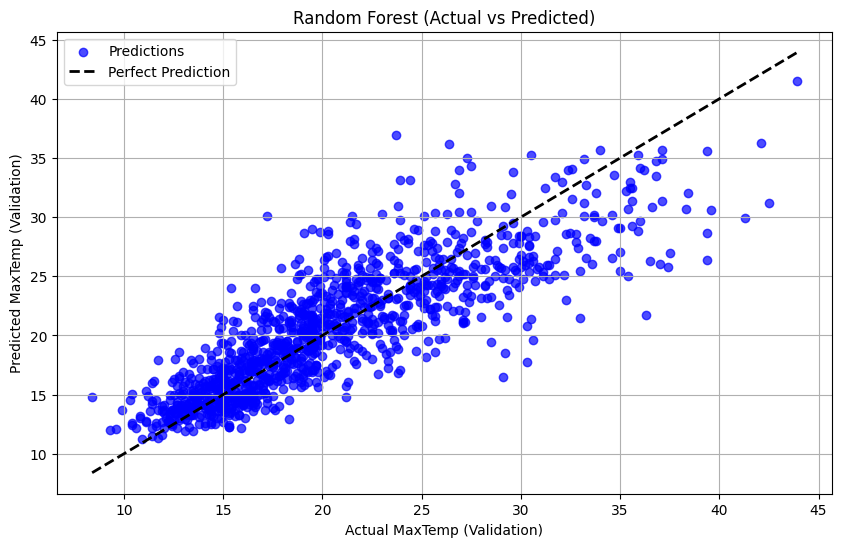

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = melb_weather_df.drop(['MinTemp', 'MaxTemp', 'Date'], axis=1)  
y_max = melb_weather_df['MaxTemp']  

# Splitting the data
X_train, X_test, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train, X_val, y_train_max, y_val_max = train_test_split(X_train, y_train_max, test_size=0.25, random_state=42)

# Random Forest Regressor
rf_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max.fit(X_train, y_train_max)

# Predict and evaluate RFR
y_predict_rf_max = rf_max.predict(X_val)
# older sklearn versions may not accept the 'squared' keyword; compute RMSE via sqrt of MSE
rmse_rf_max = root_mean_squared_error(y_val_max, y_predict_rf_max)
mse_rf_max = mean_squared_error(y_val_max, y_predict_rf_max)
mae_rf_max = mean_absolute_error(y_val_max, y_predict_rf_max)
r2_rf_max = r2_score(y_val_max, y_predict_rf_max)
print(f"RMSE - RF MaxTemp: {rmse_rf_max}")
print(f"MSE - RF MaxTemp: {mse_rf_max}")
print(f"MAE - RF MaxTemp: {mae_rf_max}")
print(f"R2 - RF MaxTemp: {r2_rf_max}")

# Gradient Boosting Regressor
gb_max = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_max.fit(X_train, y_train_max)

# Predict and evaluate GB
y_predict_gb_max = gb_max.predict(X_val)
rmse_gb_max = root_mean_squared_error(y_val_max, y_predict_gb_max)
mse_gb_max = mean_squared_error(y_val_max, y_predict_gb_max)
mae_gb_max = mean_absolute_error(y_val_max, y_predict_gb_max)
r2_gb_max = r2_score(y_val_max, y_predict_gb_max)
print(f"RMSE - GB MaxTemp: {rmse_gb_max}")
print(f"MSE - GB MaxTemp: {mse_gb_max}")
print(f"MAE - GB MaxTemp: {mae_gb_max}")
print(f"R2 - GB MaxTemp: {r2_gb_max}")

# Visualise the data on scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_val_max, y_predict_gb_max, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_val_max.min(), y_val_max.max()], [y_val_max.min(), y_val_max.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual MaxTemp (Validation)')
plt.ylabel('Predicted MaxTemp (Validation)')
plt.title('Gradient Boosting Regressor (Actual vs Predicted)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_val_max, y_predict_rf_max, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_val_max.min(), y_val_max.max()], [y_val_max.min(), y_val_max.max()], 'k--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual MaxTemp (Validation)')
plt.ylabel('Predicted MaxTemp (Validation)')
plt.title('Random Forest (Actual vs Predicted)')
plt.grid()
plt.legend()
plt.show()

In [13]:

# Create prdictions using rf and gb models
y_pred_dt = rf_max.predict(X_test)
y_pred_rf = gb_max.predict(X_test) 

# Function to evaluate the regression models using RMSE, MSE, MAE and R2 score metrics
def evaluate_regression_model(y_test, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print('-'*50)

# Generate evaluations
evaluate_regression_model(y_test_max, y_pred_dt, "Random Forest")
evaluate_regression_model(y_test_max, y_pred_rf, "Gradient Boosting")

Random Forest Evaluation:
RMSE: 3.40
MSE: 11.54
MAE: 2.45
R² Score: 0.68
--------------------------------------------------
Gradient Boosting Evaluation:
RMSE: 4.13
MSE: 17.02
MAE: 3.22
R² Score: 0.53
--------------------------------------------------
